In [999]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

In [1000]:
deaths = pd.read_csv('/Users/gageholcomb/Desktop/DDA13/Capstone/Raw_Capstone/Data/National/Overdose/Provisional_drug_overdose_death_counts_for_specific_drugs_20240731.csv')

In [1001]:
deaths

,data_as_of,death_year,death_month,jurisdiction_occurrence,drug_involved,time_period,month_ending_date,drug_overdose_deaths,footnote
0,07/10/2024,2019,1,United States,Cocaine,12 month-ending,01/31/2019,15613.0,NaN
1,07/10/2024,2019,1,United States,Fentanyl,12 month-ending,01/31/2019,30367.0,NaN
2,07/10/2024,2019,1,United States,Heroin,12 month-ending,01/31/2019,15475.0,NaN
3,07/10/2024,2019,1,United States,Methamphetamine,12 month-ending,01/31/2019,12059.0,NaN
4,07/10/2024,2019,1,United States,Oxycodone,12 month-ending,01/31/2019,5029.0,NaN
...,...,...,...,...,...,...,...,...,...
3955,07/10/2024,2023,8,Region 10,Xylazine,12 month-ending,08/31/2023,22.0,NaN
3956,07/10/2024,2023,9,Region 10,Xylazine,12 month-ending,09/30/2023,23.0,NaN
3957,07/10/2024,2023,10,Region 10,Xylazine,12 month-ending,10/31/2023,26.0,NaN
3958,07/10/2024,2023,11,Region 10,Xylazine,12 month-ending,11/30/2023,27.0,NaN


In [1002]:
deaths = pd.DataFrame(deaths)

In [1003]:
deaths = deaths.drop(columns = ['data_as_of', 'death_month', 'jurisdiction_occurrence', 'time_period', 'month_ending_date', 'footnote'])

In [1004]:
deaths.groupby(['drug_involved']).sum()

,death_year,drug_overdose_deaths
drug_involved,,
Cocaine,1333860,2835564.0
Fentanyl,1333860,6963778.0
Heroin,1333860,1274314.0
Methamphetamine,1333860,3042052.0
Oxycodone,1333860,572724.0
Xylazine,1333860,317958.0


In [1005]:
fentanyl = deaths.loc[(deaths['drug_involved'] == 'Fentanyl')]

In [1006]:
heroin = deaths.loc[(deaths['drug_involved'] == 'Heroin')]

In [1007]:
oxycodone = deaths.loc[(deaths['drug_involved'] == 'Oxycodone')]

In [1008]:
xylazine = deaths.loc[(deaths['drug_involved'] == 'Xylazine')]

In [1009]:
fentanyl = fentanyl.drop(columns = 'drug_involved')

In [1010]:
heroin = heroin.drop(columns = 'drug_involved')

In [1011]:
oxycodone = oxycodone.drop(columns = 'drug_involved')

In [1012]:
xylazine = xylazine.drop(columns = 'drug_involved')

In [1013]:
fentanyl = fentanyl.groupby(['death_year']).sum()

In [1014]:
fentanyl = fentanyl.reset_index()

In [1015]:
heroin = heroin.groupby(['death_year']).sum()

In [1016]:
heroin = heroin.reset_index()

In [1017]:
oxycodone = oxycodone.groupby(['death_year']).sum()

In [1018]:
oxycodone = oxycodone.reset_index()

In [1019]:
xylazine = xylazine.groupby(['death_year']).sum()

In [1020]:
xylazine = xylazine.reset_index()

In [1021]:
fentanyl = fentanyl.rename(columns = {'drug_overdose_deaths':'fentanyl_deaths'})

In [1022]:
heroin = heroin.rename(columns = {'drug_overdose_deaths':'heroin_deaths'})

In [1023]:
oxycodone = oxycodone.rename(columns = {'drug_overdose_deaths':'oxycodone_deaths'})

In [1024]:
xylazine = xylazine.rename(columns = {'drug_overdose_deaths':'xylazine_deaths'})

In [1025]:
fentanyl = pd.DataFrame(fentanyl)

In [1026]:
heroin = pd.DataFrame(heroin)

In [1027]:
oxycodone = pd.DataFrame(oxycodone)

In [1028]:
xylazine = pd.DataFrame(xylazine)

In [1029]:
fentanyl = fentanyl.astype('int')

In [1030]:
heroin = heroin.astype('int')

In [1031]:
oxycodone = oxycodone.astype('int')

In [1032]:
xylazine = xylazine.astype('int')

In [1033]:
one_half = fentanyl.merge(heroin, on = 'death_year')

In [1034]:
two_half = oxycodone.merge(xylazine, on = 'death_year')

In [1035]:
final_deaths = one_half.merge(two_half, on = 'death_year')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

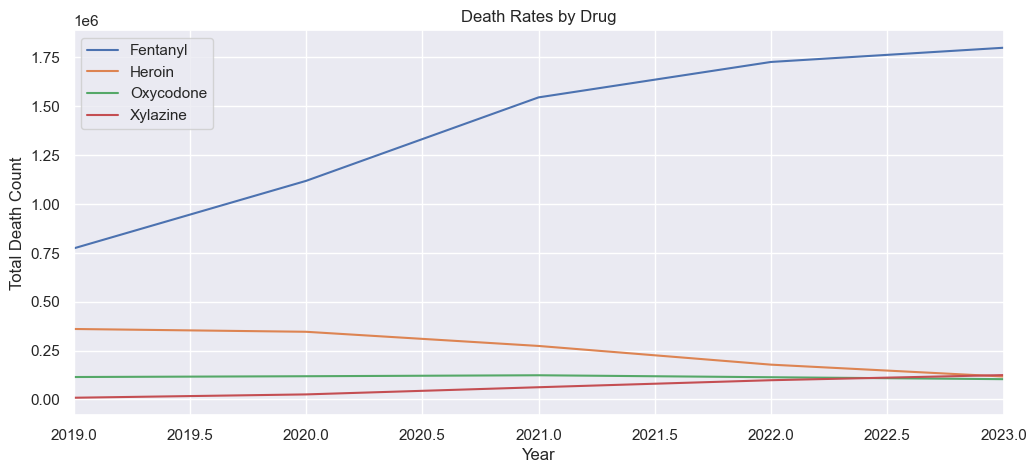

In [1036]:
plt.subplots(figsize=(12, 5))
sns.set(style="darkgrid")
sns.lineplot(x='death_year', y='fentanyl_deaths', data=final_deaths, label='Fentanyl')
sns.lineplot(x='death_year', y='heroin_deaths', data=final_deaths, label='Heroin')
sns.lineplot(x='death_year', y='oxycodone_deaths', data=final_deaths, label = 'Oxycodone')
sns.lineplot(x='death_year', y='xylazine_deaths', data=final_deaths, label = 'Xylazine').set(title='Death Rates by Drug', xlabel='Year', ylabel='Total Death Count')
plt.margins(x=0)
plt.legend()
plt.show()

In [1037]:
final_deaths

,death_year,fentanyl_deaths,heroin_deaths,oxycodone_deaths,xylazine_deaths
0,2019,772540,360274,114340,8245
1,2020,1118368,345970,118414,25346
2,2021,1545776,273426,123340,62059
3,2022,1727194,177668,113270,98021
4,2023,1799900,116976,103360,124287


In [1038]:
death = pd.read_csv('/Users/gageholcomb/Desktop/DDA13/Capstone/Raw_Capstone/Data/National/Overdose/Provisional_drug_overdose_death_counts_for_specific_drugs_20240731.csv')

In [1039]:
death

,data_as_of,death_year,death_month,jurisdiction_occurrence,drug_involved,time_period,month_ending_date,drug_overdose_deaths,footnote
0,07/10/2024,2019,1,United States,Cocaine,12 month-ending,01/31/2019,15613.0,NaN
1,07/10/2024,2019,1,United States,Fentanyl,12 month-ending,01/31/2019,30367.0,NaN
2,07/10/2024,2019,1,United States,Heroin,12 month-ending,01/31/2019,15475.0,NaN
3,07/10/2024,2019,1,United States,Methamphetamine,12 month-ending,01/31/2019,12059.0,NaN
4,07/10/2024,2019,1,United States,Oxycodone,12 month-ending,01/31/2019,5029.0,NaN
...,...,...,...,...,...,...,...,...,...
3955,07/10/2024,2023,8,Region 10,Xylazine,12 month-ending,08/31/2023,22.0,NaN
3956,07/10/2024,2023,9,Region 10,Xylazine,12 month-ending,09/30/2023,23.0,NaN
3957,07/10/2024,2023,10,Region 10,Xylazine,12 month-ending,10/31/2023,26.0,NaN
3958,07/10/2024,2023,11,Region 10,Xylazine,12 month-ending,11/30/2023,27.0,NaN


In [1040]:
death = death.loc[death['jurisdiction_occurrence'] == 'United States']

In [1041]:
pd.options.mode.chained_assignment = None 

In [1042]:
death['death_year'] = death['death_year'].astype('str')

In [1043]:
death = death[['death_year', 'drug_involved', 'drug_overdose_deaths']]

In [1044]:
dheroin = death.loc[death['drug_involved'] == 'Heroin']

In [1045]:
dfentanyl = death.loc[death['drug_involved'] == 'Fentanyl']

In [1046]:
doxycodone = death.loc[death['drug_involved'] == 'Oxycodone']

In [1047]:
dxylazine = death.loc[death['drug_involved'] == 'Xylazine']

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

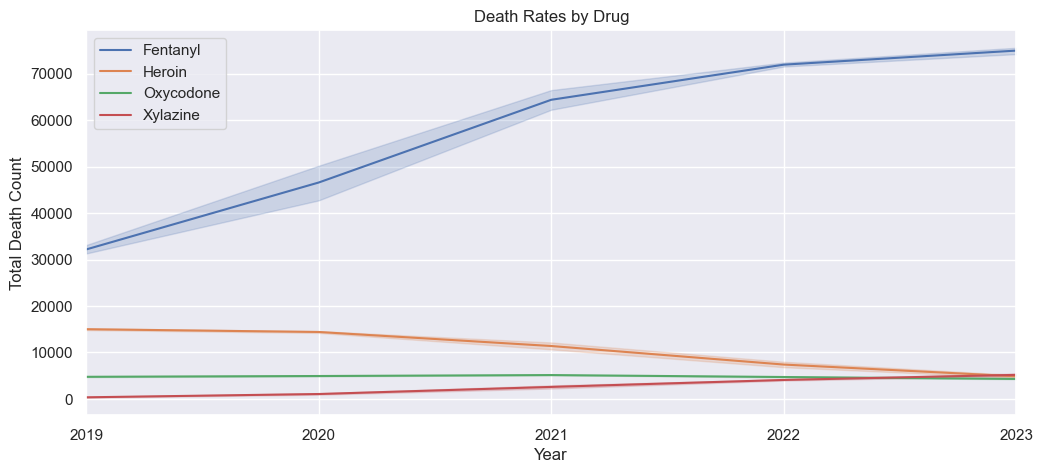

In [1048]:
plt.subplots(figsize=(12, 5))
sns.set(style="darkgrid")
sns.lineplot(x='death_year', y='drug_overdose_deaths', data=dfentanyl, label='Fentanyl')
sns.lineplot(x='death_year', y='drug_overdose_deaths', data=dheroin, label='Heroin')
sns.lineplot(x='death_year', y='drug_overdose_deaths', data=doxycodone, label = 'Oxycodone')
sns.lineplot(x='death_year', y='drug_overdose_deaths', data=dxylazine, label = 'Xylazine').set(title='Death Rates by Drug', xlabel='Year', ylabel='Total Death Count')
plt.margins(x=0)
plt.legend()
